In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt  

In [2]:
from google.colab import files
uploaded = files.upload()

Saving weather.csv to weather.csv


In [3]:

dataset = pd.read_csv('weather.csv')
temp=dataset['temperaturemin']
precipitation=dataset['precipitation']

In [4]:
dataset.head(10)

,date,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,fastest5secwindspeed,fog,fogheavy,mist,rain,fogground,ice,glaze,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
0,2021-02-13,25.0,61.0,0.00,0.0,0.0,6.93,230.0,17.90,220.0,23.94,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,2021-02-16,34.0,63.0,0.00,0.0,0.0,5.37,230.0,17.90,230.0,21.92,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,2021-02-18,52.0,78.1,0.00,0.0,0.0,10.74,230.0,17.90,280.0,23.04,Yes,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No
3,2021-03-03,35.1,53.1,0.00,0.0,0.0,10.74,70.0,21.03,80.0,29.08,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
4,2021-03-16,46.9,64.0,0.05,0.0,0.0,2.91,270.0,10.07,300.0,14.09,Yes,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No
5,2021-03-19,55.9,75.0,0.00,0.0,0.0,5.82,40.0,17.90,50.0,25.05,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
6,2021-03-21,52.0,75.0,0.00,0.0,0.0,12.75,240.0,27.96,240.0,36.01,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
7,2021-03-23,50.0,82.9,0.45,0.0,0.0,6.71,230.0,25.95,220.0,36.01,Yes,No,Yes,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No,No
8,2021-03-30,39.9,48.0,1.05,0.0,0.0,7.83,100.0,21.92,100.0,29.08,Yes,Yes,Yes,Yes,No,No,No,Yes,No,No,No,No,No,No,No,No,No
9,2021-04-01,37.9,55.0,0.00,0.0,0.0,6.26,280.0,17.90,290.0,29.97,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No


In [5]:
x = np.array(temp).reshape(-1, 1) 
y = np.array(precipitation)

In [6]:

from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split( x, y, test_size=1/3, random_state=0 )

In [7]:

from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit( xtrain, ytrain )

LinearRegression()

In [ ]:
regressor.coef_ , regressor.intercept_

(array([0.00272922]), -0.00979683568563744)

In [8]:
actualValue = ytrain
predictedValue = regressor.predict(xtrain) 
xtrain[0], actualValue[0] , predictedValue[0]

(array([35.1]), 0.0, 0.08599882176044459)

In [9]:
regressor.coef_ * xtrain[0] + regressor.intercept_ 

array([0.08599882])

In [10]:
np.sqrt ( sum( abs( actualValue**2 - predictedValue**2 ) ) ) / len( xtrain ) 


0.00720424776737392

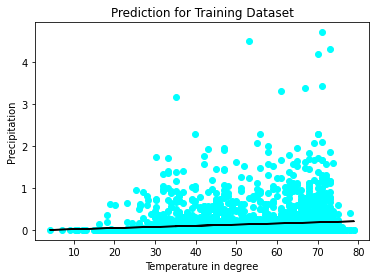

In [12]:

plt.scatter(xtrain, ytrain, color='cyan')


prediction = regressor.predict(xtrain)
plt.plot(xtrain, prediction , color = 'black') 

plt.title ("Prediction for Training Dataset")
plt.xlabel("Temperature in degree"), plt.ylabel("Precipitation")
plt.show()

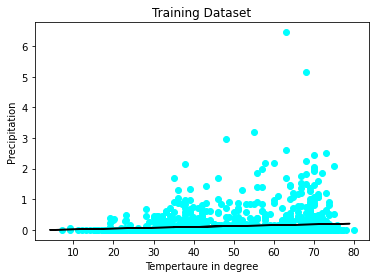

In [13]:
 

plt.scatter(xtest, ytest, color= 'cyan')

plt.plot(xtrain, regressor.predict(xtrain), color = 'black')

plt.title ("Training Dataset")
plt.xlabel("Tempertaure in degree"), plt.ylabel("Precipitation")
plt.show()

In [14]:
d=dataset['avgwindspeed'].value_counts()

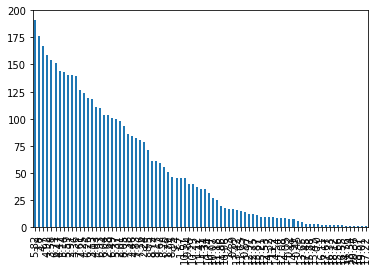

In [15]:
d.plot(kind='bar')